<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/Copy_of_%D0%A4%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_%D0%A0%D0%B0%D0%B7%D0%B1%D0%BE%D1%80_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B3%D0%BE_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F_1_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание рукописных цифр из набора данных MNIST с помощью Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [0]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential #НС прямого распространения
from tensorflow.keras.layers import Dense #Полносвязные слой
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [0]:
#Загрузка данных Mnist
#x_train_org - входные картинки, обучающая выбрка
#y_train_org - выходные индексы, обучающая выборка
#x_test_org - входные картинки, тестовая выбрка
#y_test_org - выходные индексы, тестовая выборка
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


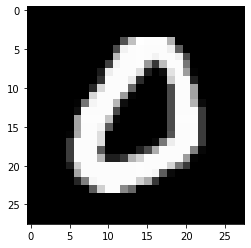

In [0]:
n = 1897 #Номер картинки

#Отрисовка картинки
#Image.fromarray - создание картинки по массиву
#.convert('RGBA') - преобразование в RGBA формат
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [0]:
#Меняем формат входных картинок с 28х28 на 784х1
#Это нужно для удобства работы с полносвязным слоем (Dense)
#С двумерной картинкой мы будем работать в будущем с помощью свёрточных сетей
#Функция .reshape меняет размер массива
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [0]:
#Нормализуем входные картинки
#НС лучше работают, если данные нормаваны от 0 до 1
#Сейчас значения во входных картинках от 0 до 255
#Надо разделить картинки на 255
#И сначала преобразовать картинки в тип float (цифры с плавающей точкой)
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 

**Работа с правильными ответами**

In [0]:
#Выводим пример индекса в выходных данных
print(y_train_org[n])

0


**Преобразуем метки в формат one hot encoding**

In [0]:
#НС сложно работать с чистыми индексами от 0 до 9
#Ей проще работать с данными в формате one hot encoding
#Это формат из 10 цифр - все 0 и одна 1 там, где правильный ответ
#Например
#Индекс 0 - это [1 0 0 0 0 0 0 0 0 0]
#Индекс 2 - это [0 0 1 0 0 0 0 0 0 0]
#Индекс 9 - это [0 0 0 0 0 0 0 0 0 1]
#Это делается функцией utils.to_categorical(
#Второй параметр - это количество классов, у нас - 10
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [0]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [0]:
#Выводим пример одного выходного вектора
print(y_train[n])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
n = 50000
x_val = x_train[n:]
y_val = y_train[n:]
y_val_org = y_train_org[n:]
x_train = x_train[:n]
y_train = y_train[:n]
y_train_org = y_train_org[:n]

## Создаем нейронную сеть

**Создаем последовательную модель**

In [0]:
#Создаём сеть прямого распространения
#Пока она пустая
#Подробнее на https://keras.io/models/sequential/
model = Sequential()

**Добавляем уровни сети**


In [0]:
#Добавляем в сеть полносвязные слои
#Dense - полносвязный слой, подробнее на https://keras.io/layers/core/
#Первый парамерт - количество нейронок, обычно от 2 до 2000, подбирается в ходе исследования
#input_dim - размер входного вектора, указывается только в первом слое сети
#activation - активационная функция нейронов данного слоя
#relu - одна из активационных функций, подробнее на https://keras.io/activations/
model.add(Dense(200, input_dim=784, activation="relu"))

#Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
#activation="softmax" - активационная функция, 
#которая делает сумму всех значений нейронов слой, равной 1
#Подробнее https://keras.io/activations/
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [0]:
#Нейронку надо "скомпилировать"
#При компиляции мы задаём несколько параметров
#loss - функция ошибки, которую оптимизирует сеть
#categorical_crossentropy - одна из функций ошибки, подходящая для классификации нескольких классов, подробнее https://keras.io/activations/
#optimizer - алгоритм обучения НС
#adam - один из алгоритмов обучения НС, подробнее https://keras.io/optimizers/
#metrics - метрика качества обучения, измеряется после каждой эпохи обучения
#accuracy - метрика, процент правильно распознанных примеров, подробнее https://keras.io/metrics/
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Вывод структуры нейронки
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [0]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка, перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выбрки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
#validation_split - процент данных, на которых сеть не обучается, на которых мы измеряем точность распознавания
model.fit(x_train, y_train, batch_size=200, epochs=10,  verbose=1, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 1s 15us/sample - loss: 0.4024 - acc: 0.8903 - val_loss: 0.2039 - val_acc: 0.9449
Epoch 2/10
50000/50000 [==============================] - 1s 14us/sample - loss: 0.1845 - acc: 0.9474 - val_loss: 0.1533 - val_acc: 0.9597
Epoch 3/10
50000/50000 [==============================] - 1s 14us/sample - loss: 0.1324 - acc: 0.9620 - val_loss: 0.1212 - val_acc: 0.9652
Epoch 4/10
50000/50000 [==============================] - 1s 13us/sample - loss: 0.1023 - acc: 0.9713 - val_loss: 0.1086 - val_acc: 0.9678
Epoch 5/10
50000/50000 [==============================] - 1s 14us/sample - loss: 0.0816 - acc: 0.9767 - val_loss: 0.0982 - val_acc: 0.9717
Epoch 6/10
50000/50000 [==============================] - 1s 13us/sample - loss: 0.0659 - acc: 0.9814 - val_loss: 0.0952 - val_acc: 0.9720
Epoch 7/10
50000/50000 [==============================] - 1s 13us/sample - loss: 0.0554 - acc: 0.9849 - val_loss: 0.

#Фильтруем обучающую выборку

In [0]:
pred = model.predict(x_train)
pred = np.argmax(pred, axis=1)

In [0]:
print(pred[:20])
print(y_train_org[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [0]:
mask = pred == y_train_org
print(mask.shape)
print(mask[:100])

(50000,)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [0]:
x_train_filtered = x_train[mask]
y_train_filtered = y_train[mask]

In [0]:
print(x_train_filtered.shape)
print(y_train_filtered.shape)

(49749, 784)
(49749, 10)


In [0]:
model_f = Sequential()
model_f.add(Dense(200, input_dim=784, activation="relu"))
model_f.add(Dense(10, activation="softmax"))
model_f.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_f.fit(x_train_filtered, y_train_filtered, batch_size=200, epochs=10,  verbose=1, validation_data=(x_val, y_val))

Train on 49749 samples, validate on 10000 samples
Epoch 1/10
49749/49749 [==============================] - 1s 16us/sample - loss: 0.3821 - acc: 0.8944 - val_loss: 0.2051 - val_acc: 0.9439
Epoch 2/10
49749/49749 [==============================] - 1s 15us/sample - loss: 0.1632 - acc: 0.9526 - val_loss: 0.1445 - val_acc: 0.9607
Epoch 3/10
49749/49749 [==============================] - 1s 15us/sample - loss: 0.1126 - acc: 0.9671 - val_loss: 0.1184 - val_acc: 0.9661
Epoch 4/10
49749/49749 [==============================] - 1s 14us/sample - loss: 0.0828 - acc: 0.9755 - val_loss: 0.1080 - val_acc: 0.9690
Epoch 5/10
49749/49749 [==============================] - 1s 14us/sample - loss: 0.0641 - acc: 0.9816 - val_loss: 0.0980 - val_acc: 0.9721
Epoch 6/10
49749/49749 [==============================] - 1s 14us/sample - loss: 0.0498 - acc: 0.9857 - val_loss: 0.0944 - val_acc: 0.9737
Epoch 7/10
49749/49749 [==============================] - 1s 15us/sample - loss: 0.0402 - acc: 0.9890 - val_loss: 0.

In [0]:
ev = model.evaluate(x_test, y_test)
ev_f = model_f.evaluate(x_test, y_test)

print('Точность на тестовой до фильтрации', ev[1])
print('Точность на тестовой после фильтрации', ev_f[1])

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0829 - acc: 0.9765
Точность на тестовой до фильтрации 0.9778
Точность на тестовой после фильтрации 0.9765
